# Importing all the required libraries

- ### Pandas
- ### Numpy
- ### Tensorflow
- ### Keras
- ### Matplotlib
- ### Seaborn

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

### importing <font color='orange'>handwritten digits</font> from keras

In [3]:
(X_train, Y_train) ,(X_test, Y_test) = keras.datasets.mnist.load_data()

In [4]:
print("total number of X training samples",len(X_train))
print("total number of values training samples",len(Y_train))

total number of X training samples 60000
total number of values training samples 60000


In [5]:
print("total number of X testing samples",len(X_test))
print("total number of testing values of testing samples",len(Y_test))

total number of X testing samples 10000
total number of testing values of testing samples 10000


## shape of the samples

In [6]:
X_train[0].shape

(28, 28)

## how does the data array look ? (0 = <font color ='black'>BLACK</font> and 255 = <font color ='black'>WHITE</font> )

In [7]:
## X_train[0]

X_train = X_train / 255
X_test = X_test / 255

## taking a look into some sample images and their values

image: 38 value: 7
image: 39 value: 6
image: 40 value: 1


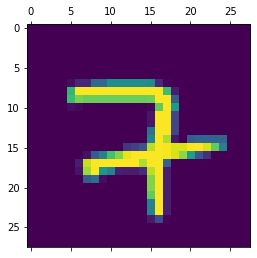

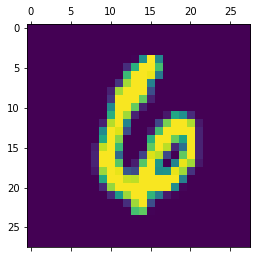

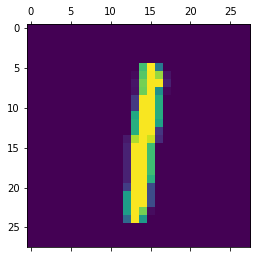

In [8]:
for i in range(3):
    plt.matshow(X_train[i+38])
    print("image:",i+38,"value:",Y_train[i+38])

## Flattening the training data from X_train shape = (60,000,28,28) to (60,000,784)

In [9]:
X_train_F = X_train.reshape(len(X_train),28*28)
X_test_F = X_test.reshape(len(X_test),28*28)

In [10]:
print("shape of X_train  :",X_train.shape)
print("shape of X_train_F:",X_train_F.shape)
print("shape of X_test   :",X_test.shape)
print("shape of X_test_F :",X_test_F.shape)

shape of X_train  : (60000, 28, 28)
shape of X_train_F: (60000, 784)
shape of X_test   : (10000, 28, 28)
shape of X_test_F : (10000, 784)


## Making a <font color="orange">Simple Neural Network</font>

In [12]:
## creating stack of Layers
model = keras.Sequential([
    ## neurons from the layer is connected to every neural of second layer
    ## 10 is output and input shape is 784 ,activation layer
    keras.layers.Dense(10,input_shape = (784,),activation = "sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_F,Y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.7084 - accuracy: 0.8170
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3083 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2714 - accuracy: 0.9245
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2638 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2525 - accuracy: 0.9296
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2607 - accuracy: 0.9274
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2538 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2518 - accuracy: 0.9293
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.254

## evaluating the model

In [13]:
model.evaluate(X_test_F,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2672 - accuracy: 0.9263


[0.26720675826072693, 0.9262999892234802]

In [14]:
y_predicted = model.predict(X_test_F)
y_predicted[0]

array([4.7528446e-03, 1.6056177e-08, 9.8022819e-03, 9.6711802e-01,
       1.5082061e-03, 1.5769109e-01, 2.2258781e-08, 9.9984914e-01,
       9.7732484e-02, 7.3229378e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

## Plotting the confusion matrix

Text(69.0, 0.5, 'Truth')

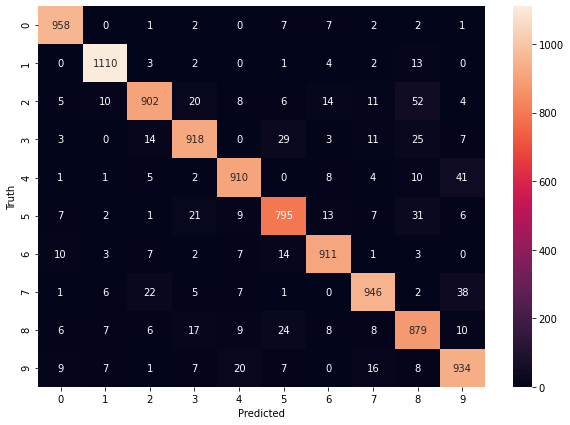

In [17]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
## creating stack of Layers
model1 = keras.Sequential([
    ## neurons from the layer is connected to every neural of second layer
    ## 10 is output and input shape is 784 ,activation layer
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(64 ,activation = "relu"),
    keras.layers.Dense(128 ,activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model1.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4665 - accuracy: 0.8648
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1195 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0798 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0617 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0388 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0266 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.021

In [36]:
model1.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9773


[0.08544779568910599, 0.9772999882698059]

In [30]:
y_predicted = model.predict(X_test_F)
y_predicted[0]

array([4.7528446e-03, 1.6056177e-08, 9.8022819e-03, 9.6711802e-01,
       1.5082061e-03, 1.5769109e-01, 2.2258781e-08, 9.9984914e-01,
       9.7732484e-02, 7.3229378e-01], dtype=float32)

In [24]:
Y_predicted_labels = [np.argmax(i) for i in y_predicted]
Y_predicted_labels[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

Text(69.0, 0.5, 'Truth')

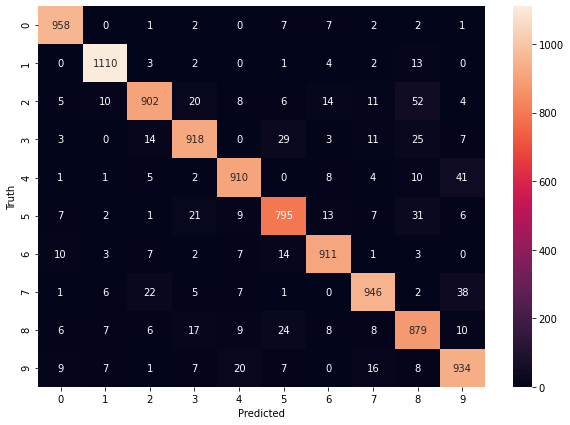

In [26]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')